In [34]:
using Plots
using Distributions
using SpecialFunctions
using Random
using DataFrames
using Combinatorics
using RobustMeans

In [ ]:
function median_of_means_th(X)
    alpha=0.025
    n = length(X)
    k = trunc(Int, 8 * log(1 / alpha))
    m = div(n, k)
    indic = repeat(1:k, inner = m)
    indic = indic[randperm(length(indic))]
    moyennes = [mean(X[findall(indic .== block)]) for block in 1:k]

    return median(moyennes)
end

In [ ]:
function run_median_of_means_th(X, N)
    results = Vector{Float64}(undef, N)  # Initialiser un vecteur pour stocker les résultats

    for i in 1:N
        results[i] = median_of_means_th(X)  # Appeler la fonction median_of_means_th et stocker le résultat
    end

    return minimum(results), maximum(results),maximum(results)-minimum(results),mean(results),std(results)
end

In [ ]:
Y=rand(Pareto(1.2,3),10000)
run_median_of_means_th(Y,1000)

L'intervalle de confiance à 97.5% est de [12.176628037728845,14.991519791968473], l'espérance de la variable aléatoire est de 1.5 et est bien présente dans l'intervalle de confiance.

In [35]:
function median_of_means(X, k)
    if k > length(X)
        k = ceil(Int, length(X) / 2)
    end
    indic = repeat(1:k, inner = div(length(X), k))
    indic = indic[randperm(length(indic))]  # Mélange les indices aléatoirement
    moyennes = [mean(X[findall(indic .== block)]) for block in 1:k]
    return median(moyennes)
end

median_of_means (generic function with 1 method)

In [37]:
X=rand(Pareto(2.2,3), 100000)
# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(X, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MOM en fonction de k", legend=false)
hline!([5.5], label="Espérance", color=:red, linestyle=:dash)

savefig("C:/Users/aicha/OneDrive/Bureau/Plot/KPareto1000.pdf")


"C:\\Users\\aicha\\OneDrive\\Bureau\\Plot\\KPareto1000.pdf"

In [7]:
data=rand(Weibull(0.5),10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MOM en fonction de k", legend=false)
hline!([2], label="Espérance", color=:red, linestyle=:dash)

savefig("C:/Users/aicha/OneDrive/Bureau/Plot/KW1000.png")


"C:\\Users\\aicha\\OneDrive\\Bureau\\Plot\\KW1000.png"

In [32]:
# Génération des données
data = rand(Weibull(0.5), 10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
p = plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k", legend=false)


# Tracer une ligne horizontale pour l'espérance
hline!(p, [2], label="Espérance", color=:red, linestyle=:dash)



plot(p,inset = (p_zoom, bbox(0.5, 0.5, 0.4, 0.4), loc=:topright))




ErrorException: syntax: invalid named tuple element "bbox(0.5, 0.5, 0.4, 0.4)" around c:\Users\aicha\OneDrive\Bureau\Estimateur_Robuste\Projet_estimateurs_robustes\Nbr_blocks.ipynb:22

In [33]:
# Création du graphique principal
p = plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k", legend=false)

# Tracer une ligne horizontale pour l'espérance
hline!(p, [2], label="Espérance", color=:red, linestyle=:dash)

# Création d'un sous-graphique pour le zoom
p_zoom = plot(25:75, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Zoom sur l'évolution de l'estimateur MoM en fonction de k", legend=false)

# Tracer une ligne horizontale pour l'espérance
hline!(p_zoom, [2], label="Espérance", color=:red, linestyle=:dash)

# Afficher les deux graphiques
plot(p, p_zoom, layout=(1,2), inset = (p_zoom, bbox(0.5, 0.5, 0.4, 0.4), loc=:topright))


ErrorException: syntax: invalid named tuple element "bbox(0.5, 0.5, 0.4, 0.4)" around c:\Users\aicha\OneDrive\Bureau\Estimateur_Robuste\Projet_estimateurs_robustes\Nbr_blocks.ipynb:16

In [ ]:
insetbox = bbox(0.5,0.5,0.4,0.2)

In [ ]:
#Je veux utiliser la inset pour zoomer sur la région de k=25 à 75
#plot(p, bbox(0.2, 0.2, 0.4, 0.4), loc=:topright)

In [29]:
using Plots
using Distributions

# Génération des données
data = rand(Weibull(0.5), 10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
p = plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k", legend=false)

# Tracer une ligne horizontale pour l'espérance
hline!(p, [2], label="Espérance", color=:red, linestyle=:dash)

# Ajouter un zoom dans le coin supérieur droit
inset(p, bbox(1.05, 0.6, 0.4, 0.3), 
    plot(k_values[1:100], estimateurs[1:100], marker=:circle, xlabel="", ylabel="",
        title="Zoom", legend=false))

UndefVarError: UndefVarError: `inset` not defined

In [22]:

# Génération des données
data = rand(Weibull(0.5), 10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
p = plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k")

# Ajouter un zoom sur les valeurs de k de 1 à 75
zoom_xlims = (1, 75)
zoom_ylims = (1.8, 2.2)
plot!(p, zoom_xlims[1]:zoom_xlims[2], zoom_ylims[1]:0.05:zoom_ylims[2], subplot=1, color=:lightgray, legend=false, framestyle=:box, opacity=0.5)
annotate!(p, 10, 2.15, text("Zoom", :black, :left))

# Tracer une ligne horizontale pour l'espérance
hline!(p, [2], label="Espérance", color=:red, linestyle=:dash)



In [11]:
# Génération des données
data = rand(Weibull(0.5), 10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
p = plot(k_values, estimateurs,xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k")

# Ajouter un petit zoom sur les valeurs de k de 1 à 75 sur p au coin à droite

plot!(p, k_values[1:75], estimateurs[1:75], subplot=2, marker=:circle, legend=false)



BoundsError: BoundsError: attempt to access 1-element Vector{Plots.Subplot} at index [2]

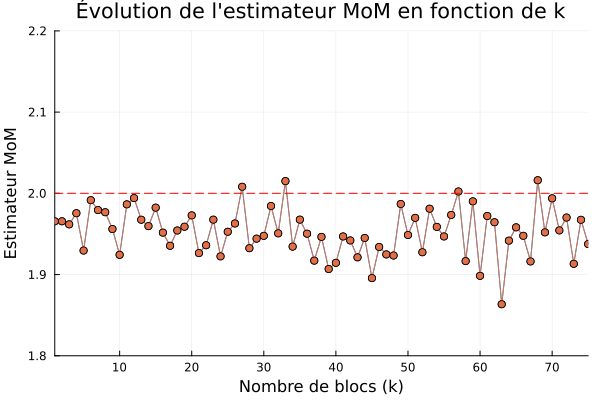

In [ ]:
# Génération des données
data = rand(Weibull(0.5), 10000)

# Nombre de blocs (k) à tester
k_values = 1:1000

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [median_of_means(data, k) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
p = plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MoM en fonction de k")



# Tracer une ligne horizontale pour l'espérance
hline!([2], label="Espérance", color=:red, linestyle=:dash)

# Afficher le plot
p

In [31]:
function rob_median_of_means(X, k, l)
    res = [median_of_means(X, k) for _ in 1:l]
    return mean(res)
end

X=rand(Exponential(0.5),10000)

# Nombre de blocs (k) à tester
k_values = 1:75
l=50

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [rob_median_of_means(X, k, l) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MOM en fonction de k", legend=false)
hline!([0.5], label="Espérance", color=:red, linestyle=:dash)

savefig("C:/Users/aicha/OneDrive/Bureau/Plot/KRobExpo75.pdf")

"C:\\Users\\aicha\\OneDrive\\Bureau\\Plot\\KRobExpo75.pdf"

In [20]:
T=rand(LogNormal(0,2),10000)
mean(T)

6.9055195826631035

In [14]:
Y=rand(Weibull(0.5),10000)
# Nombre de blocs (k) à tester
k_values = 1:1000
l=50

# Calculer l'estimateur pour chaque valeur de k
estimateurs = [rob_median_of_means(Y, k, l) for k in k_values]

# Tracer l'évolution de l'estimateur en fonction de k
plot(k_values, estimateurs, marker=:circle, xlabel="Nombre de blocs (k)", ylabel="Estimateur MoM",
    title="Évolution de l'estimateur MOM en fonction de k", legend=false)
hline!([2], label="Espérance", color=:red, linestyle=:dash)

savefig("C:/Users/aicha/OneDrive/Bureau/Plot/KRobW1000.png")

"C:\\Users\\aicha\\OneDrive\\Bureau\\Plot\\KRobW1000.png"

In [ ]:
#Estimateur  Minsker 

function median_of_means_minsker(X, k)
    if k > length(X)
        k = ceil(Int, length(X) / 2)
    end
    
    n = length(X)
    all_combinations = collect(combinations(1:n,k))
    means_vector = Float64[]

    for combination in all_combinations
        indic = falses(n)
        indic[combination] .= true
        moyennes = [mean(X[indic .== true]) for _ in 1:k]
        push!(means_vector, mean(moyennes))
    end
    
    return median(means_vector)
end

In [ ]:
data4=rand(Exponential(0.3), 20)
median_of_means_minsker_th(data4, 7)